In [25]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [26]:
def is_flake_of_stone(flake_id, stone_id) -> bool:
    return flake_id[:6] == stone_id[:6]

In [27]:
letters = ['a', 'b', 'c', 'd', 'e', 'f',]

In [29]:
dataset = pd.read_excel('data/Melton_sequence_data_sample.xlsx', sheet_name='SAMPLE_DATA')
# dataset

In [30]:
stone_id = 'BT.1.A'

In [31]:
G = nx.DiGraph()
for index, row in dataset.iterrows():
    if is_flake_of_stone(row['Sample_ID'], stone_id):
        G.add_node(row['Sample_ID'])
for index, row in dataset.iterrows():
    if is_flake_of_stone(row['Sample_ID'], stone_id):
        for l in letters:
            if row[f'Subsequent_removal_{l}'] == row[f'Subsequent_removal_{l}']:
                G.add_edge(row['Sample_ID'], row[f'Subsequent_removal_{l}'])
print(G)

DiGraph with 26 nodes and 68 edges


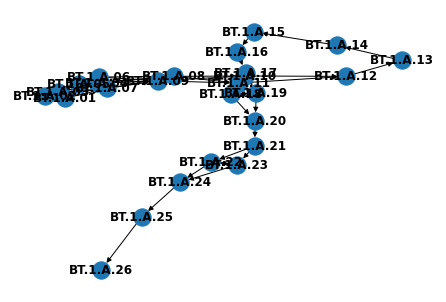

In [33]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()